## 회귀

- 소득이 증가하면 소비도 증가. 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형 관계가 있다고 할 수 있음
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고림즘을 Simple Linear Regression(단순선형회귀) 이라고 함. 지도학습
- 변수 X와 Y에 대한 정보를 가지고 일차 방정식의 계수 a,b를 찾는 과정이 단순회귀분석 알고리즘


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_excel('dataset/auto-mpg.xlsx')
ndf = df[['mpg','cylinders','horsepower','weight']]

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
import warnings
warnings.filterwarnings('ignore')
ndf.horsepower.replace('?',np.nan,inplace=True)
# df.horsepower.unique()
ndf.dropna(subset=['horsepower'], axis=0,inplace=True)

In [5]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


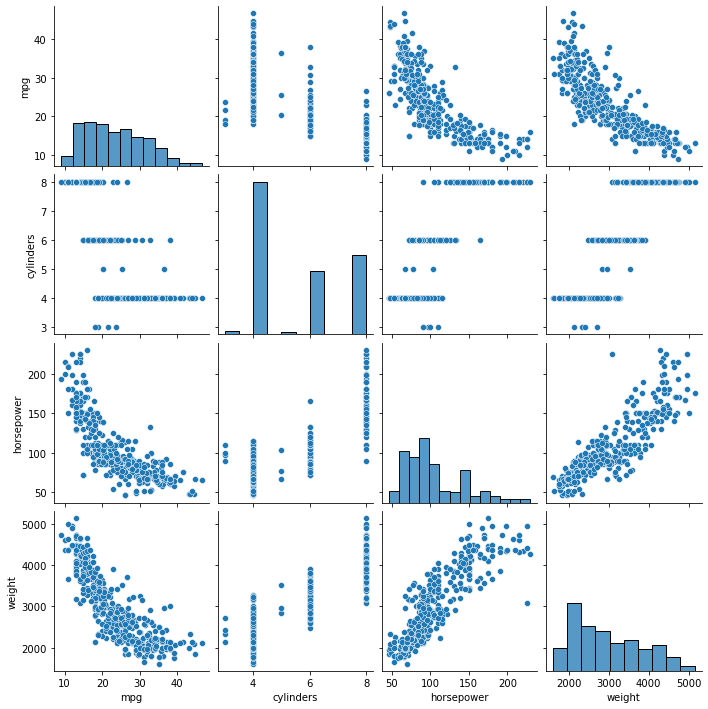

In [6]:
sns.pairplot(data=ndf)

In [34]:
# 변수(속성) 선택

X = ndf[['weight']] # 독립변수
y = ndf['mpg'] # 종속변수

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state=11)


In [37]:
from sklearn.linear_model import LinearRegression # 선형회귀

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
y_preds[:5]

array([29.27985295, 25.65957977, 27.90795996, 24.97363328, 15.02740907])

## 회귀 평가 지표

- MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
- MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
- RMSE : MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것 보 정)
- R square : 분산 기반으로 예측 성능을 평가. 실제값의 붆산 대비 예측값의 분산 비율을 지표로 함.

https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-17-%ED%9A%8C%EA%B7%80-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C



In [49]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)
print('MSE : {:.3f}, RMSE : {:.3f}, R2 score : {:.3f}'.format(mse,rmse,r2))

MSE : 22.169, RMSE : 4.708, R2 score : 0.641


In [48]:
print('기울기 a :',lr.coef_)
print('절편 b :',lr.intercept_)

기울기 a : [-0.00762163]
절편 b : 45.971217704757684


<AxesSubplot:ylabel='Frequency'>

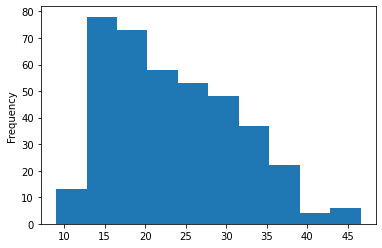

In [51]:
y.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

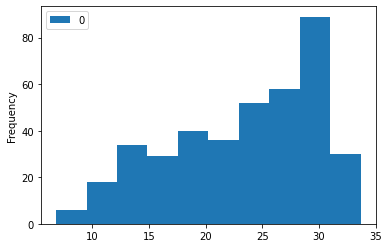

In [54]:
y_hat = lr.predict(X)
pd.DataFrame(y_hat).plot(kind='hist')

C:\anaconda3\envs\cakd3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\envs\cakd3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


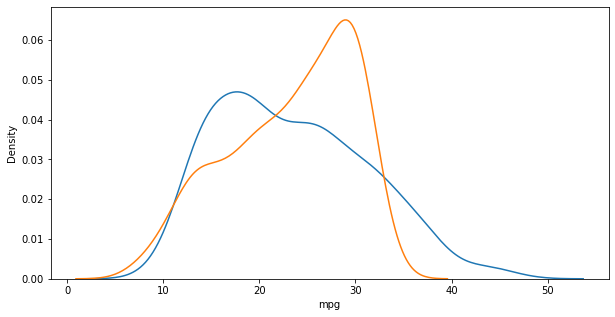

In [55]:
plt.figure(figsize = (10,5))

ax1 = sns.distplot(y,hist=False , label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y')

### 다항 회귀분석

- 직선보다 곡선으로 설명하는것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
- 2차 함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘
- 다항 회귀도 선형 회귀임, 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관

In [72]:
# 변수(속성) 선택

X = ndf[['weight']] # 독립변수
y = ndf['mpg'] # 종속변수

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state=0)


In [86]:
from sklearn.preprocessing import PolynomialFeatures # 다항식변환

poly = PolynomialFeatures(degree = 2) # 2차항 적용
X_train_poly = poly.fit_transform(X_train) # X_train data를 2차항으로 변환

print(X_train.shape)
print(X_train_poly.shape)
print(X_train_poly[:5])

(274, 1)
(274, 3)
[[1.0000000e+00 2.7200000e+03 7.3984000e+06]
 [1.0000000e+00 3.9070000e+03 1.5264649e+07]
 [1.0000000e+00 2.3000000e+03 5.2900000e+06]
 [1.0000000e+00 2.0650000e+03 4.2642250e+06]
 [1.0000000e+00 4.6330000e+03 2.1464689e+07]]


In [88]:
# r2_score() 사용
from sklearn.metrics import r2_score
pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)
y_preds_poly = pr.predict(X_test_poly)
r_square = r2_score(y_test,y_preds_poly)
r_square

0.6721104316263187

In [84]:
pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
r_square



0.6721104316263187

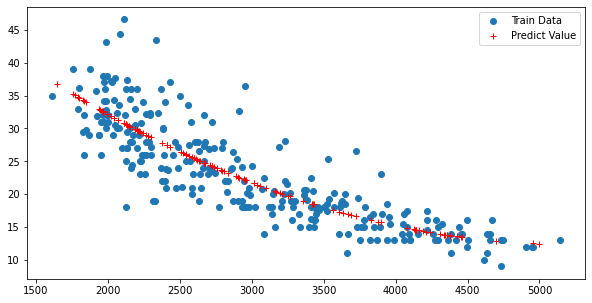

In [90]:
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize = (10,5))

ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_hat_test,'r+',label='Predict Value')
ax.legend(loc='best')

C:\anaconda3\envs\cakd3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\envs\cakd3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


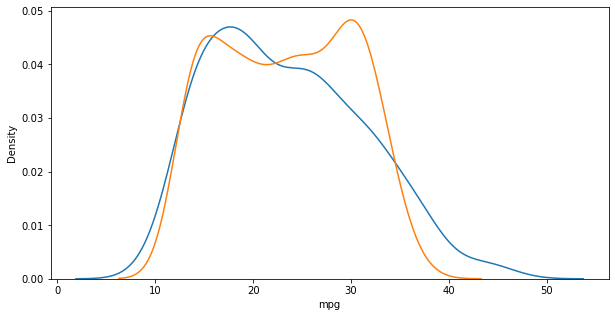

In [92]:
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False,label='y')
ax2 = sns.distplot(y_hat, hist= False, label='y_hat')

### 다중 회귀분석

- 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 겨웅에 다중회귀분석을 사용
- 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성. 지도학습

In [94]:
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [101]:
X = ndf[['cylinders','horsepower','weight']]
y = ndf['mpg']

X_train ,X_test , y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=0)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

r_square = r2_score(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE : {:.3f}, RMSE : {:.3f}, R2 score : {:.3f}'.format(mse,rmse,r_square))

MSE : 19.674, RMSE : 4.436, R2 score : 0.680


In [103]:
print('X변수의 계수: ', lr.coef_)
print('절편: ', lr.intercept_)

X변수의 계수:  [-0.57598375 -0.03393439 -0.00537578]
절편:  45.99088694107766


C:\anaconda3\envs\cakd3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\envs\cakd3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


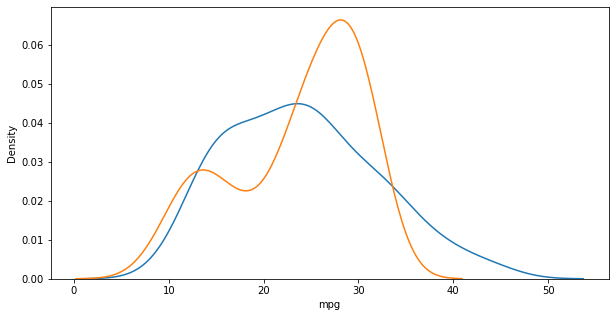

In [106]:
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,5))

ax1 = sns.distplot(y_test, hist = False, label='y')
ax2 = sns.distplot(y_hat, hist = False, label = 'y_hat')

In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

ndf_ms = scaler.fit_transform(ndf)
ndf_ms_df = pd.DataFrame(data = ndf_ms, columns = ndf.columns)
ndf_ms_df.head()

,mpg,cylinders,horsepower,weight
0,0.239362,1.0,0.456522,0.536150
1,0.159574,1.0,0.646739,0.589736
2,0.239362,1.0,0.565217,0.516870
3,0.186170,1.0,0.565217,0.516019
4,0.212766,1.0,0.510870,0.520556


In [119]:
# r_squared 
X = ndf_ms_df[['cylinders','horsepower','weight']]
y = ndf_ms_df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
r2 = r2_score(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)


print('MSE : {:.3f}, RMSE : {:.3f}, R2 score : {:.3f}'.format(mse,rmse,r_square))

MSE : 0.014, RMSE : 0.118, R2 score : 0.680


C:\anaconda3\envs\cakd3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

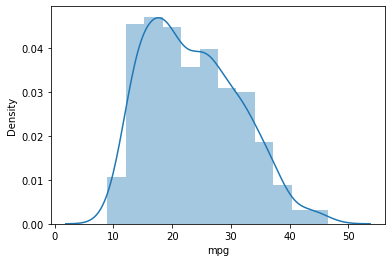

In [120]:
sns.distplot(ndf.mpg)

C:\anaconda3\envs\cakd3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

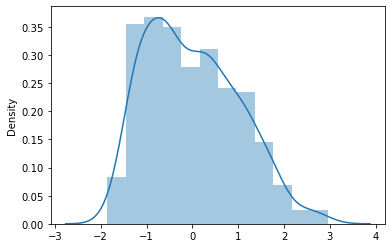

In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(ndf[['mpg']])
scaled_data_df = pd.DataFrame(scaled_data)

sns.distplot(scaled_data_df)

C:\anaconda3\envs\cakd3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

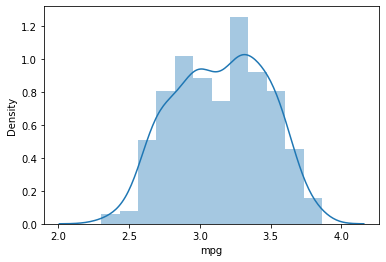

In [133]:
log_mpg = np.log1p(ndf['mpg'])
sns.distplot(log_mpg)

In [2]:
# 과제 
# Q.로그 변환된 종속변수를 적용하여 다중회귀 분석 결과를 평가하세요.
# (r_square, 로그 변환된 MSE, RMSE)


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('dataset/auto-mpg.xlsx')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [10]:
ndf.horsepower.replace('?',np.nan,inplace=True)
ndf.dropna(subset=['horsepower'],axis=0, inplace=True)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


<ipython-input-10-c6d7edac2efe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.dropna(subset=['horsepower'],axis=0, inplace=True)


In [12]:
ndf.info()
ndf.horsepower.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [18]:
from sklearn.model_selection import train_test_split

X = ndf[['cylinders','horsepower','weight']]
y = np.log1p(ndf['mpg'])

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=0)

In [36]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)

r_square = r2_score(y_test,y_predict)

mse = mean_squared_error(y_test,y_predict)

rmse = np.sqrt(mse)

print('MSE : {:.3f}, RMSE : {:.3f}, R2 score : {:.3f}'.format(mse,rmse,r_square))

MSE : 19.674, RMSE : 4.436, R2 score : 0.680
